In [58]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [59]:
# Download training dataset
dataset = MNIST(root='/Users/parthavjoshi/Jupyter_notebooks/PyTorch tuts', download=True)

In [60]:
len(dataset)

60000

In [61]:
test_dataset = MNIST(root='/Users/parthavjoshi/Jupyter_notebooks/PyTorch tuts', train=False)
len(test_dataset)

10000

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

It's evident that these images are relatively small in size, and recognizing the digits can sometimes be challenging even for the human eye. While it's useful to look at these images, there's just one problem here: PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

In [63]:
import torchvision.transforms as transforms

In [64]:
dataset = MNIST(root = '/Users/parthavjoshi/Jupyter_notebooks/PyTorch tuts', 
                train = True,
                transform = transforms.ToTensor()) 

In [65]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [127]:
print(img_tensor[:, :, :])
print(label)
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

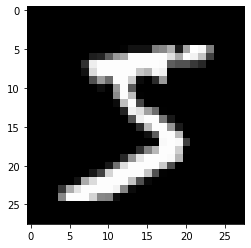

In [125]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0, :, :], cmap = 'gray')

In [68]:
len(dataset)

60000

In [69]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [70]:
from torch.utils.data import DataLoader

In [71]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size = batch_size)

In [72]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [82]:
print(model.weight)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0206,  0.0101, -0.0217,  ..., -0.0228, -0.0237, -0.0006],
        [ 0.0031,  0.0032, -0.0350,  ...,  0.0177, -0.0108,  0.0274],
        [ 0.0044,  0.0310,  0.0313,  ...,  0.0277, -0.0098,  0.0187],
        ...,
        [ 0.0191,  0.0257,  0.0227,  ...,  0.0272,  0.0079,  0.0248],
        [ 0.0168,  0.0235, -0.0189,  ..., -0.0252, -0.0202, -0.0069],
        [ 0.0305, -0.0059, -0.0187,  ...,  0.0342, -0.0102, -0.0029]],
       requires_grad=True)

In [46]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0253, -0.0107, -0.0221,  0.0283,  0.0281, -0.0231, -0.0042,  0.0068,
         0.0310, -0.0247], requires_grad=True)

In [47]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([6, 9, 6, 3, 8, 9, 3, 8, 6, 7, 5, 9, 4, 2, 5, 2, 9, 1, 4, 1, 6, 1, 9, 5,
        3, 5, 1, 0, 3, 1, 5, 1, 7, 5, 3, 4, 5, 2, 9, 9, 4, 0, 1, 1, 5, 8, 1, 3,
        0, 0, 3, 6, 9, 5, 4, 9, 6, 5, 2, 1, 2, 4, 8, 3, 1, 2, 2, 9, 2, 0, 8, 0,
        9, 3, 7, 5, 8, 9, 0, 8, 5, 0, 2, 4, 8, 7, 2, 5, 6, 6, 1, 1, 6, 6, 2, 4,
        5, 1, 3, 1, 7, 9, 6, 1, 5, 4, 6, 2, 1, 4, 0, 7, 0, 7, 8, 3, 0, 3, 0, 2,
        4, 5, 5, 7, 5, 6, 6, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [49]:
images.shape

torch.Size([128, 1, 28, 28])

In [50]:
images.reshape(128, 784).shape

torch.Size([128, 784])

Building a custom model to flatten out the seep input tensor to a vector which is accepted by the model

In [51]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [52]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [53]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0197,  0.0180,  0.0030,  ..., -0.0110,  0.0344, -0.0021],
         [-0.0022,  0.0039,  0.0205,  ...,  0.0162, -0.0234, -0.0137],
         [ 0.0019,  0.0288, -0.0041,  ...,  0.0194,  0.0318, -0.0206],
         ...,
         [-0.0214, -0.0306, -0.0307,  ...,  0.0189, -0.0253,  0.0145],
         [-0.0312,  0.0050, -0.0253,  ...,  0.0338, -0.0084, -0.0076],
         [ 0.0264, -0.0110,  0.0226,  ...,  0.0076,  0.0318,  0.0198]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0151, -0.0189,  0.0304, -0.0026, -0.0352, -0.0271, -0.0126,  0.0047,
          0.0138, -0.0194], requires_grad=True)]

In [56]:
for images, labels in train_loader:
    print(images.shape)
    print(labels)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
tensor([0, 4, 6, 9, 7, 4, 3, 9, 0, 0, 8, 7, 0, 8, 5, 9, 7, 4, 2, 0, 1, 6, 5, 7,
        6, 4, 1, 7, 2, 9, 5, 8, 1, 7, 7, 8, 8, 9, 4, 4, 0, 6, 0, 6, 6, 4, 3, 4,
        4, 8, 8, 3, 3, 8, 6, 1, 6, 3, 4, 0, 9, 4, 2, 5, 3, 5, 9, 3, 1, 2, 1, 7,
        8, 2, 3, 5, 3, 1, 5, 8, 2, 3, 5, 1, 0, 0, 4, 0, 3, 9, 8, 8, 6, 6, 4, 0,
        9, 3, 5, 3, 2, 2, 2, 1, 9, 8, 0, 0, 3, 1, 4, 3, 7, 1, 7, 7, 2, 7, 9, 0,
        9, 1, 7, 2, 3, 6, 2, 1])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.2199,  0.1610, -0.0206, -0.2808,  0.2623, -0.5304, -0.0404,  0.4963,
         -0.4446, -0.1220],
        [-0.2114,  0.0861, -0.0233,  0.1941, -0.2915,  0.2186, -0.1363, -0.0327,
         -0.0328, -0.3220]])


In [101]:
import torch.nn.functional as F

In [102]:
outputs[:2]

tensor([[-4.8751e-01,  1.5404e-01, -6.6399e-04,  6.0260e-02,  2.3186e-01,
          1.1993e-01,  1.6310e-01, -5.4435e-01, -2.3498e-01, -1.5069e-01],
        [-3.2491e-01,  1.4766e-01, -2.4283e-01,  5.0112e-02,  1.9741e-01,
          3.6702e-01,  3.7663e-01, -8.5196e-02, -1.6227e-01, -8.5570e-06]],
       grad_fn=<SliceBackward>)

In [103]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0637, 0.1210, 0.1037, 0.1102, 0.1308, 0.1170, 0.1221, 0.0602, 0.0820,
         0.0892],
        [0.0681, 0.1093, 0.0740, 0.0991, 0.1149, 0.1361, 0.1374, 0.0866, 0.0802,
         0.0943]])
Sum:  0.9999998807907104


In [104]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 6, 4, 5, 2, 2, 3, 6, 3, 3, 6, 3, 3, 4, 3, 3, 6, 6, 2, 2, 4, 1, 6, 4,
        2, 2, 5, 5, 3, 2, 4, 1, 3, 4, 6, 1, 8, 4, 1, 1, 3, 1, 6, 1, 4, 6, 2, 6,
        4, 4, 6, 8, 8, 3, 4, 4, 4, 4, 4, 1, 5, 3, 4, 5, 1, 1, 5, 1, 2, 5, 6, 4,
        4, 4, 4, 1, 4, 4, 4, 1, 2, 4, 4, 3, 4, 5, 1, 5, 2, 4, 6, 2, 3, 4, 1, 4,
        4, 1, 1, 4, 4, 6, 5, 5, 6, 4, 6, 4, 4, 5, 3, 3, 6, 6, 6, 5, 3, 6, 6, 3,
        3, 4, 4, 2, 6, 1, 6, 4])
tensor([0.1308, 0.1374, 0.1269, 0.1198, 0.1213, 0.1412, 0.1240, 0.1804, 0.1295,
        0.1457, 0.1844, 0.1210, 0.1419, 0.1246, 0.1316, 0.1268, 0.1141, 0.1364,
        0.1199, 0.1177, 0.1384, 0.1326, 0.1341, 0.1332, 0.1277, 0.1275, 0.1146,
        0.1249, 0.1282, 0.1313, 0.1429, 0.1152, 0.1324, 0.1499, 0.1492, 0.1320,
        0.1433, 0.1343, 0.1626, 0.1327, 0.1258, 0.1408, 0.1459, 0.1307, 0.1292,
        0.1260, 0.1296, 0.1335, 0.1432, 0.1262, 0.1386, 0.1215, 0.1243, 0.1278,
        0.1329, 0.1253, 0.1392, 0.1262, 0.1435, 0.1273, 0.1186, 0.1213, 0.1225,
       

In [105]:
labels

tensor([2, 1, 3, 4, 7, 2, 9, 1, 9, 7, 3, 4, 4, 4, 9, 6, 4, 8, 5, 3, 3, 9, 1, 3,
        0, 9, 9, 1, 7, 3, 3, 5, 4, 2, 1, 4, 9, 3, 4, 4, 9, 9, 2, 3, 0, 4, 5, 3,
        5, 6, 1, 6, 0, 6, 0, 6, 7, 6, 7, 7, 1, 0, 0, 1, 2, 9, 1, 9, 7, 3, 3, 2,
        8, 9, 3, 9, 6, 1, 1, 9, 7, 3, 3, 6, 4, 8, 9, 1, 3, 3, 5, 3, 6, 3, 7, 5,
        2, 5, 9, 6, 6, 2, 2, 2, 3, 1, 3, 7, 3, 5, 9, 7, 1, 1, 1, 8, 8, 1, 1, 7,
        4, 3, 8, 6, 4, 9, 3, 0])

## Evaluation Metric and Loss Function

In [106]:
torch.sum(preds == labels)

tensor(4)

In [107]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [108]:
accuracy(outputs, labels)

tensor(0.0312)

In [109]:
probs

tensor([[0.0637, 0.1210, 0.1037,  ..., 0.0602, 0.0820, 0.0892],
        [0.0681, 0.1093, 0.0740,  ..., 0.0866, 0.0802, 0.0943],
        [0.0911, 0.0995, 0.1026,  ..., 0.0905, 0.0935, 0.0887],
        ...,
        [0.0844, 0.1337, 0.1197,  ..., 0.0689, 0.1053, 0.0823],
        [0.1032, 0.0993, 0.0964,  ..., 0.1031, 0.0956, 0.0988],
        [0.0854, 0.0989, 0.1175,  ..., 0.0882, 0.1011, 0.0912]],
       grad_fn=<SoftmaxBackward>)

In [114]:
loss_fn = F.cross_entropy
#cross entropy is good for classification problems

In [111]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3765, grad_fn=<NllLossBackward>)


## Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```




In [112]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [115]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [117]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3161768913269043, 'val_acc': 0.0894976258277893}

In [118]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9456, val_acc: 0.6220
Epoch [1], val_loss: 1.6784, val_acc: 0.7231
Epoch [2], val_loss: 1.4785, val_acc: 0.7629
Epoch [3], val_loss: 1.3273, val_acc: 0.7839
Epoch [4], val_loss: 1.2111, val_acc: 0.7988


In [120]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1195, val_acc: 0.8094
Epoch [1], val_loss: 1.0460, val_acc: 0.8157
Epoch [2], val_loss: 0.9858, val_acc: 0.8210
Epoch [3], val_loss: 0.9357, val_acc: 0.8259
Epoch [4], val_loss: 0.8933, val_acc: 0.8304


In [121]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8570, val_acc: 0.8335
Epoch [1], val_loss: 0.8254, val_acc: 0.8374
Epoch [2], val_loss: 0.7978, val_acc: 0.8413
Epoch [3], val_loss: 0.7734, val_acc: 0.8434
Epoch [4], val_loss: 0.7516, val_acc: 0.8453


In [122]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7321, val_acc: 0.8466
Epoch [1], val_loss: 0.7145, val_acc: 0.8481
Epoch [2], val_loss: 0.6985, val_acc: 0.8507
Epoch [3], val_loss: 0.6839, val_acc: 0.8519
Epoch [4], val_loss: 0.6705, val_acc: 0.8534


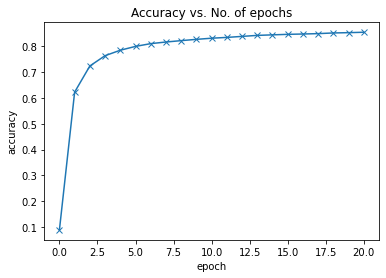

In [123]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with individual images

In [125]:
# Define test dataset
test_dataset = MNIST(root='/Users/parthavjoshi/Jupyter_notebooks/PyTorch tuts', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


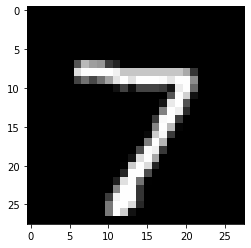

In [126]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [127]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


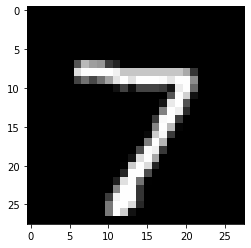

In [128]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


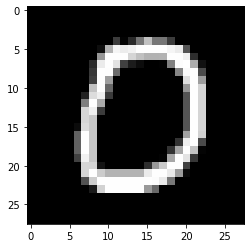

In [129]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [130]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6413054466247559, 'val_acc': 0.8607422113418579}